#### Importing the libraries

In [10]:
!pip install getContinent


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from getconti import getConti


#### Loading the data

In [2]:
df = pd.read_csv (r"C:\Users\Fleet Data Analyst\Downloads\Billionaire Data\Billionaire.csv")

#### Data inspection

In [3]:
df.tail(100)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2655,Wu Wei,$1.1 B,China,education,2524,53.0,Service
2656,Xiao Guoqing,$1.1 B,China,education,2524,52.0,Service
2657,George Yancopoulos,$1.1 B,United States,pharmaceuticals,2524,61.0,Healthcare
2658,Yao Lisheng,$1.1 B,China,electronics,2524,51.0,Technology
2659,Yu Faxiang,$1.1 B,China,"tourism, cultural industry",2524,49.0,Media & Entertainment
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [4]:
df.shape

(2755, 7)

#### Research Questions

In [5]:
1. Which top 10 industries have the highest Networth?
2. Which countries have the highest Networth
3. Who are the top billionaires in Asia?
4. Who are top billionaires in Africa?
5. How many billionaires do we have in America?
6. Which countries have the least number of billionaires?

SyntaxError: invalid syntax (4024540878.py, line 2)

#### Data Cleaning/ Preprocessing

In [6]:
df.info()
# Checking the data types and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [7]:
# cleaning the Networth column
df['NetWorth']

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2755, dtype: object

In [8]:
# replacing B and $ with  blank
df['NetWorth']= df.NetWorth.apply(lambda x: str(x).replace('B', ''))
df['NetWorth'] = df.NetWorth.apply(lambda x: str(x).replace('$', ''))
df['NetWorth']

#changing the datatype
df['NetWorth']= df['NetWorth'].astype(float)

# or 

# df['NetWorth'] = df.NetWorth.apply(lambda x:float(x))

df['NetWorth']

0       177.0
1       151.0
2       150.0
3       124.0
4        97.0
        ...  
2750      1.0
2751      1.0
2752      1.0
2753      1.0
2754      1.0
Name: NetWorth, Length: 2755, dtype: float64

In [ ]:
#confirm the datatypes
df.dtypes

In [ ]:
#Checking the missing data
data_missing = df[df.isna().Age]
data_missing 

In [ ]:
# drop the missing view data frame
data_drop_Age = df.dropna()

In [ ]:
#check the current shape
data_drop_Age.shape

In [ ]:
# check duplicates
df.duplicated().sum()

In [ ]:
# data quick statistics
df.describe()

In [ ]:
# check the min value (Age)
youngest_billionaire = df[df.Age == 18]
youngest_billionaire 

#### Data Analysis

In [ ]:
#1 .Which top 10 industries have the highest Networth?

In [ ]:
# writting a function to avoid repetion
def billionaires(y = '', x= ''):
    Top_hghst_Netwth = df.groupby(y)[x].sum().reset_index()
    Top_hghst_Netwth =  Top_hghst_Netwth.sort_values(by = x,ascending= False).head(10)
    return  Top_hghst_Netwth




In [ ]:
# Top_10_ind_hghst_Netwth = df.groupby('Industry')['NetWorth'].sum().reset_index()
# Top_10_ind_hghst_Netwth = Top_10_ind_hghst_Netwth.sort_values(by = 'NetWorth',ascending= False).head(10) 
# Top_10_ind_hghst_Netwth
y= billionaires (y = 'Industry', x= 'NetWorth')

In [ ]:
# plt.figure(figsize=(15, 16))
plt.figure(figsize=(15, 10))
plt.title('Top 10 Industries based on Net Worth')
sns.barplot(data=y, y='Industry', x='NetWorth', palette='Blues_d')
plt.xlabel('NetWorth')
plt.xticks(rotation=45)
plt.ylabel('Net Worth (in billions)')
plt.show()

In [ ]:
#2. Which countries have the highest Networth

In [ ]:
#calling billionaires function and passing two arguments
x = billionaires(y ='Country', x= 'NetWorth')
x

In [ ]:
#Plotting the output
plt.figure(figsize=(15, 16))
plt.title('Top 10 Countries with the highest NetWorth')
sns.barplot(data=x, y='Country', x='NetWorth', palette='magma')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('NetWorth (in billions)')
plt.show()

In [ ]:
#3. Who are the top billionaires in Asia?

In [ ]:
# # Asia is a continent not country
# Top_bill_Asia = billionaires(y='Country', x='NetWorth')
# Top_bill_Asia = Top_bill_Asia[Top_bill_Asia['Country'] == 'Hong Kong']
# Top_bill_Asia

In [22]:
# check the countries in the database
df= df['Country'].value_counts()
pd.set_option('display.max_rows',70)
df

United States           724
China                   626
India                   140
Germany                 136
Russia                  118
Hong Kong                71
Brazil                   65
Canada                   64
United Kingdom           56
Italy                    51
Japan                    49
Taiwan                   47
Australia                44
South Korea              43
France                   42
Sweden                   41
Switzerland              40
Thailand                 31
Spain                    30
Turkey                   27
Singapore                27
Israel                   25
Indonesia                21
Philippines              17
Malaysia                 17
Mexico                   13
Austria                  12
Norway                   12
Netherlands              12
Denmark                  10
Chile                     9
Ireland                   9
Czechia                   9
Poland                    8
Ukraine                   7
Finland             

In [ ]:
# Check the columns in the dataframe
df.columns

In [13]:
a = getConti()

C:\Python\lib\site-packages\getconti


In [15]:
df['Continent']= df.Country.apply(lambda x: a.getContinents(x))
df

,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology,North America
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive,North America
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail,Europe
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology,North America
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology,North America
...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,Technology,Asia
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,Manufacturing,Asia
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,Metals & Mining,Asia
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,Diversified,Asia


In [18]:
billionaire_Asia = df[df.Continent == 'Asia'].sort_values(by='NetWorth',ascending= False).head(10)
billionaire_Asia

#select top 10


,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified,Asia
12,Zhong Shanshan,68.9,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage,Asia
14,Ma Huateng,65.8,China,internet media,15,49.0,Technology,Asia
20,Colin Zheng Huang,55.3,China,e-commerce,21,41.0,Technology,Asia
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,Diversified,Asia
25,Jack Ma,48.4,China,e-commerce,26,56.0,Technology,Asia
28,Masayoshi Son,45.4,Japan,"internet, telecom",29,63.0,Telecom,Asia
30,Tadashi Yanai & family,44.1,Japan,fashion retail,31,72.0,Fashion & Retail,Asia
34,Wang Wei,39.0,China,package delivery,35,50.0,Service,Asia
36,He Xiangjian,37.7,China,home appliances,37,78.0,Manufacturing,Asia


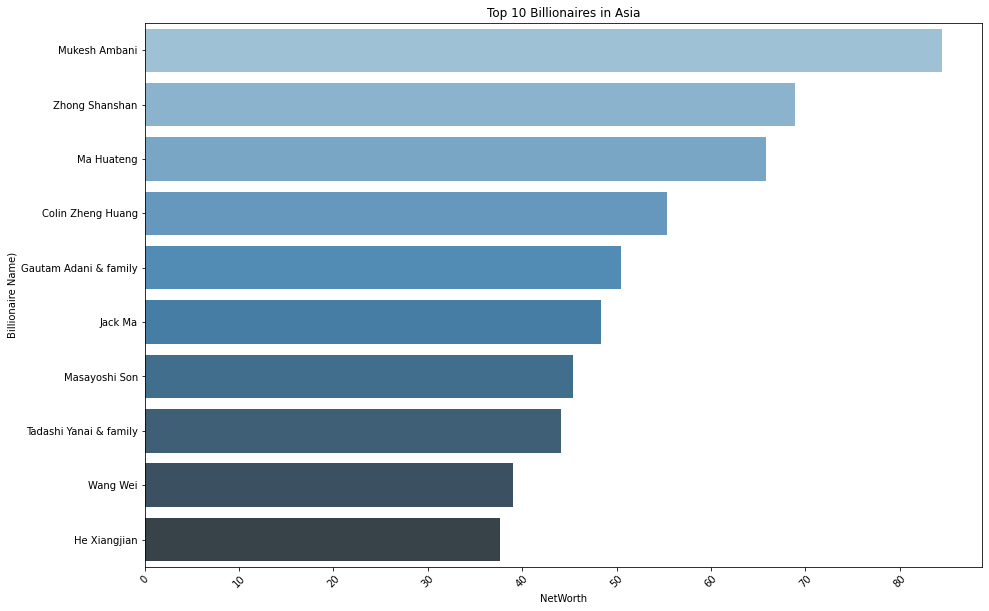

In [19]:
#Plotting the graph
# plt.figure(figsize=(15, 16))
plt.figure(figsize=(15, 10))
plt.title('Top 10 Billionaires in Asia')
sns.barplot(data=billionaire_Asia, y='Name', x='NetWorth', palette='Blues_d')
plt.xlabel('NetWorth')
plt.xticks(rotation=45)
plt.ylabel('Billionaire Name)')
plt.show()

In [20]:
#Who are top billionaires in Africa?
billionaire_Africa = df[df.Continent == 'Africa'].sort_values(by='NetWorth',ascending= False).head(10)
billionaire_Africa 


,Name,NetWorth,Country,Source,Rank,Age,Industry,Continent
190,Aliko Dangote,11.5,Nigeria,"cement, sugar",191,63.0,Manufacturing,Africa
301,Nassef Sawiris,8.3,Egypt,"construction, investments",297,60.0,Construction & Engineering,Africa
309,Nicky Oppenheimer & family,8.0,South Africa,diamonds,308,75.0,Metals & Mining,Africa
364,Johann Rupert & family,7.1,South Africa,luxury goods,358,70.0,Fashion & Retail,Africa
439,Mike Adenuga,6.1,Nigeria,"telecom, oil",440,67.0,Diversified,Africa
580,Abdulsamad Rabiu,4.9,Nigeria,"cement, sugar",574,60.0,Diversified,Africa
597,Issad Rebrab & family,4.8,Algeria,food,589,77.0,Food & Beverage,Africa
977,Naguib Sawiris,3.2,Egypt,telecom,956,66.0,Telecom,Africa
1008,Koos Bekker,3.0,South Africa,"media, investments",1008,68.0,Media & Entertainment,Africa
1091,Patrice Motsepe,2.9,South Africa,mining,1064,59.0,Metals & Mining,Africa


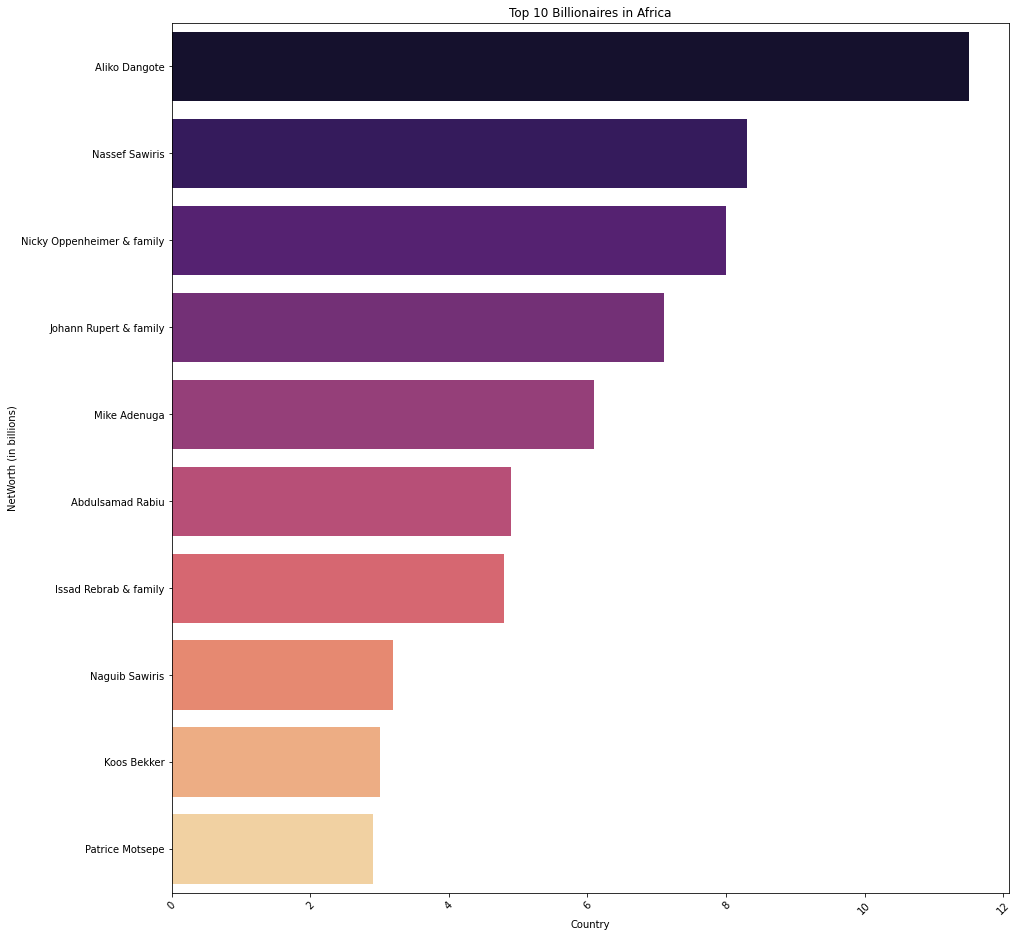

In [21]:
# plotting
#Plotting the output
plt.figure(figsize=(15, 16))
plt.title('Top 10 Billionaires in Africa')
sns.barplot(data=billionaire_Africa, y='Name', x='NetWorth', palette='magma')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('NetWorth (in billions)')
plt.show()

In [25]:
# How many billionaires do we have in America?
df['Country']= df['Country'== 'America'].value_counts()

KeyError: False

In [ ]:
#Which countries have the least number of billionaires?